In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import re

In [2]:
df=pd.read_csv("mail_data.csv",encoding="ISO-8859-1")

In [3]:
df.shape

(5572, 2)

In [4]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [6]:
df["Category"]=df["Category"].replace({"spam":"0",
                                 "ham":"1"})

In [7]:
df.head()

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
port_stem=PorterStemmer()

In [9]:
def stem_content(content):
    stem_words=re.sub("[^a-zA-Z]"," ",content)
    stem_words=stem_words.lower()
    stem_words=stem_words.split()
    stem_words=[port_stem.stem(word) for word in stem_words if not word in stopwords.words("english")]
    stem_words=" ".join(stem_words)
    return stem_words

In [10]:
df["Message"]=df["Message"].apply(stem_content)

In [11]:
df.head()

,Category,Message
0,1,go jurong point crazi avail bugi n great world...
1,1,ok lar joke wif u oni
2,0,free entri wkli comp win fa cup final tkt st m...
3,1,u dun say earli hor u c alreadi say
4,1,nah think goe usf live around though


In [12]:
df["Category"]

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object

In [13]:
df["Message"]

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri wkli comp win fa cup final tkt st m...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    nd time tri contact u u pound prize claim easi...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: Message, Length: 5572, dtype: object

In [14]:
X=df["Message"].values
y=df["Category"].values

In [15]:
print(X)

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat'
 'ok lar joke wif u oni'
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli'
 ... 'piti mood suggest'
 'guy bitch act like interest buy someth els next week gave us free'
 'rofl true name']


In [16]:
print(y)

['1' '1' '0' ... '1' '1' '1']


In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [18]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


# WordCloud generate

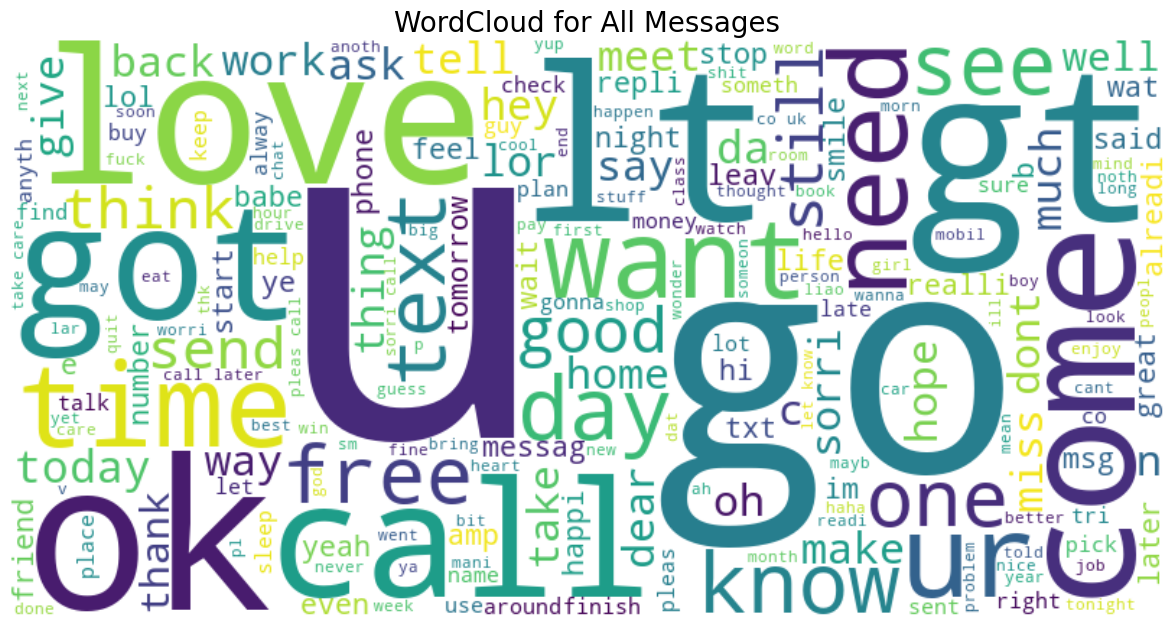

In [36]:
# Combine all messages into a single string
text = " ".join(Message for Message in df['Message'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(15, 7.5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud for All Messages", fontsize=20)
plt.show()


# Feature Extraction

In [19]:
# transforms the text data to feature vectors that can be used as input to the LogisticRegression
feature_extraction=TfidfVectorizer()
X_train_features=feature_extraction.fit_transform(X_train)
X_test_features=feature_extraction.transform(X_test)

# convert y_train and y_test values as integers
y_train=y_train.astype("int")
y_test=y_test.astype("int")

In [20]:
print(X_train_features)

  (0, 3969)	0.22422566614651124
  (0, 5387)	0.2515115377594589
  (0, 5323)	0.3066696261653324
  (0, 1661)	0.426184270773034
  (0, 5452)	0.29050946658546395
  (0, 1082)	0.358346868679249
  (0, 2114)	0.4063431025874304
  (0, 4196)	0.208499049957572
  (0, 4586)	0.22623970933348034
  (0, 1461)	0.26675146118446663
  (0, 4213)	0.2589400650794878
  (1, 2118)	0.2680254583784647
  (1, 4461)	0.30682233426850475
  (1, 4980)	0.29002750049719406
  (1, 147)	0.23986064804016122
  (1, 1314)	0.21635656162945344
  (1, 4069)	0.3606515676125802
  (1, 2171)	0.2067728630399252
  (1, 1403)	0.2692934502523703
  (1, 3145)	0.40305641073460635
  (1, 2680)	0.23351114363990885
  (1, 2577)	0.1885666763934136
  (1, 1512)	0.38429196872653903
  (2, 931)	0.31668889473250084
  (2, 2032)	0.6964936616513412
  :	:
  (4452, 1967)	0.21119416867594362
  (4452, 2133)	0.2426917777586048
  (4452, 5438)	0.30095930979445307
  (4452, 3270)	0.30423106087062834
  (4452, 4434)	0.2735032810472839
  (4452, 2713)	0.38582078634356226
  (4

In [21]:
print(X_test_features)

  (0, 372)	0.17700925043055957
  (0, 854)	0.2758600337421142
  (0, 1096)	0.2854818775491183
  (0, 1184)	0.23830792844368442
  (0, 1890)	0.1352707858236773
  (0, 2083)	0.30690737126342893
  (0, 2223)	0.5827674050055431
  (0, 2699)	0.29836407984967195
  (0, 2806)	0.2681771398406884
  (0, 3255)	0.30690737126342893
  (0, 3523)	0.21688243472937377
  (1, 150)	0.260866145060156
  (1, 544)	0.3605405264775621
  (1, 1023)	0.34838891579864867
  (1, 2265)	0.3148737104084659
  (1, 2758)	0.26175336666105864
  (1, 3875)	0.3875991925130976
  (1, 3913)	0.3605405264775621
  (1, 4812)	0.2051778233225681
  (1, 4898)	0.20092433780622457
  (1, 5320)	0.3875991925130976
  (2, 485)	0.5705656228329186
  (2, 1348)	0.30389857644168733
  (2, 1950)	0.1991284860099722
  (2, 1967)	0.1991284860099722
  :	:
  (1110, 2684)	0.19214046857631342
  (1110, 2811)	0.19012777619644258
  (1110, 3134)	0.45712647157744624
  (1110, 3407)	0.2079002951392425
  (1110, 3732)	0.1990654615783173
  (1110, 4484)	0.17548864036184963
  (1110

# Training data

In [22]:
model=LogisticRegression()

In [23]:
# training the logisticRegression model with the training data
model.fit(X_train_features,y_train)

LogisticRegression()

# Evaluating the trained model

In [24]:
# prediction on training data
prediction_on_training_data=model.predict(X_train_features)
accuracy_on_training_data=accuracy_score(y_train,prediction_on_training_data)

In [25]:
print("Accuracy on training data:",accuracy_on_training_data)

Accuracy on training data: 0.9724029616333857


In [26]:
# prediction on test data
prediction_on_test_data=model.predict(X_test_features)
accuracy_on_test_data=accuracy_score(y_test,prediction_on_test_data)

In [27]:
print("Accuracy on test data:",accuracy_on_test_data)

Accuracy on test data: 0.968609865470852


In [28]:
input_mail=["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times."]
# convert text to feature_vectors
input_data_features=feature_extraction.transform(input_mail)
# making prediction
prediction=model.predict(input_data_features)
print(prediction)

if (prediction[0]==1):
    print("Ham mail")
else:
    print("spam mail")

[1]
Ham mail


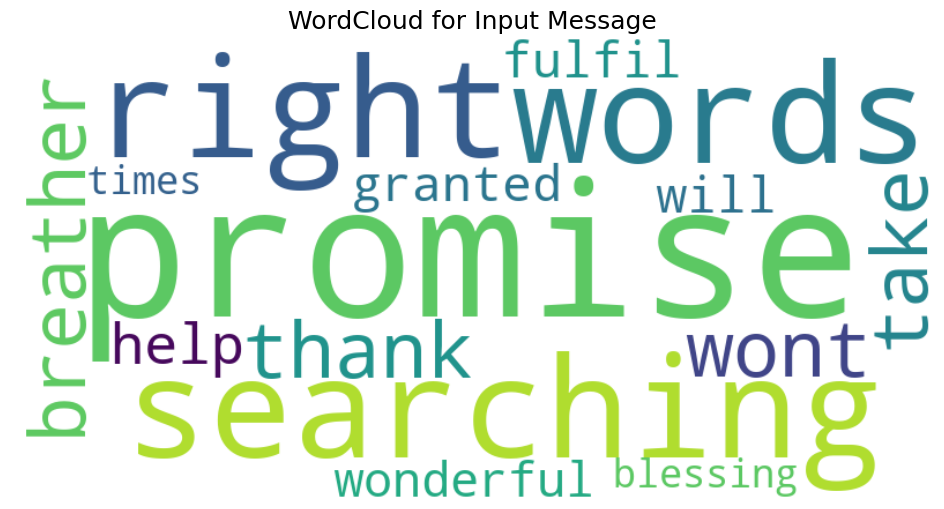

In [37]:
# The input mail
input_mail = ["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times."]

# Combine message into a single string
text = " ".join(input_mail)

# Generate the WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud for Input Message", fontsize=18)
plt.show()
